Dog vs Cat Prediction


work flow


step1: dataset: extarct zip, count, resize, select required no of images. or upload the data

step2: image preprocessing >> reshape, convert to numpy arrays.

step3: Train test Split

step4: use pretrained model: in this case we use: Moblie net v2

step5: validation

In [ ]:
#install kaggle

!pip install kaggle

In [ ]:
# configure path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



Import dog vs cat dataset from kaggle

In [ ]:
# kagle API

!

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls


 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [ ]:
# extract the compressed files: dog-vs-cat dataset file

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('complted')

complted


In [ ]:
# extract train dataset


from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('completed')

completed


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('No of images: ', file_count)

No of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.479.jpg', 'cat.9546.jpg', 'cat.4144.jpg', 'dog.8989.jpg', 'cat.12147.jpg', 'cat.12328.jpg', 'dog.1803.jpg', 'cat.340.jpg', 'dog.1421.jpg', 'cat.2501.jpg', 'dog.7692.jpg', 'cat.1914.jpg', 'cat.8234.jpg', 'dog.8441.jpg', 'dog.2949.jpg', 'cat.1229.jpg', 'cat.6771.jpg', 'cat.9039.jpg', 'cat.2089.jpg', 'cat.6452.jpg', 'dog.7797.jpg', 'dog.8212.jpg', 'cat.2159.jpg', 'dog.1435.jpg', 'cat.10026.jpg', 'cat.5526.jpg', 'dog.7574.jpg', 'dog.11318.jpg', 'cat.9302.jpg', 'cat.4850.jpg', 'cat.7629.jpg', 'cat.661.jpg', 'cat.6193.jpg', 'dog.7353.jpg', 'dog.657.jpg', 'cat.4757.jpg', 'dog.4309.jpg', 'dog.6692.jpg', 'dog.4676.jpg', 'cat.4939.jpg', 'dog.7770.jpg', 'cat.9451.jpg', 'dog.5699.jpg', 'cat.4084.jpg', 'dog.5184.jpg', 'cat.2414.jpg', 'cat.12167.jpg', 'dog.1860.jpg', 'dog.885.jpg', 'dog.1131.jpg', 'dog.2075.jpg', 'dog.8536.jpg', 'dog.7554.jpg', 'dog.3894.jpg', 'cat.9832.jpg', 'dog.10284.jpg', 'cat.162.jpg', 'dog.4703.jpg', 'dog.12097.jpg', 'dog.5729.jpg', 'cat.4997.jpg', 'cat.11499.jpg', 'dog.

import dependencies and display images of dogs and cat

In [ ]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow #as cv2.imshow doesn't work in collab

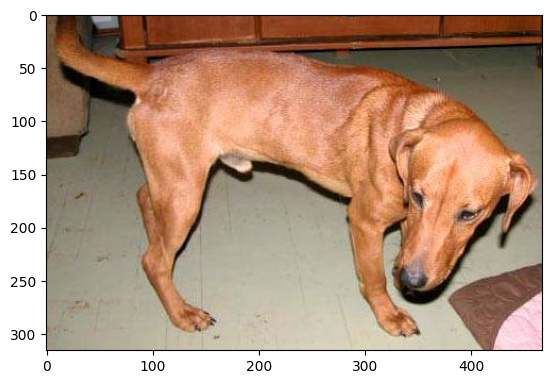

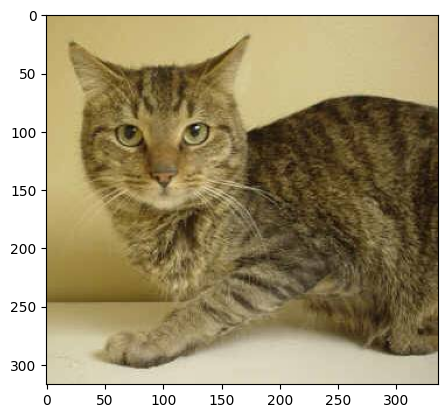

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8667.jpg')
imgplt = plt.imshow(img)
plt.show()

# display cat image
img = mpimg.imread('/content/train/cat.6394.jpg')
imgplt = plt.imshow(img)
plt.show()


In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0])

d
c
c
d
c


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0]

  if name == 'd':
    dog_count += 1

  else:
    cat_count += 1

print('No of dog images =', dog_count)
print('No of cat images =', cat_count)

No of dog images = 12500
No of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(5000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

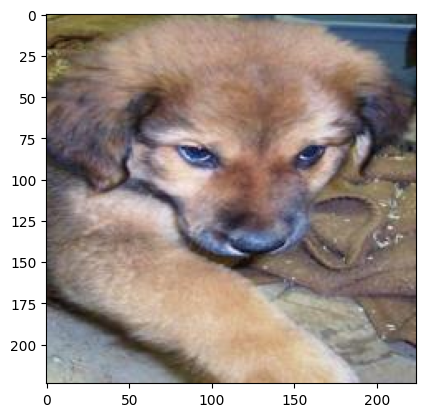

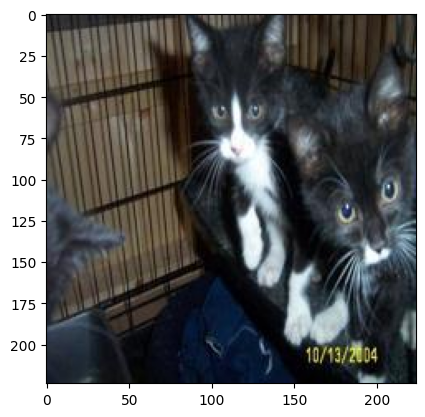

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.479.jpg')
imgplt = plt.imshow(img)
plt.show()

# display resized cat image
img = mpimg.imread('/content/image resized/cat.9546.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Dog =  0

Cat = 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(5000):

  file_name = filenames[i]
  label = file_name[0]

  if label == 'd':
    labels.append(0)

  else:
    labels.append(1)

In [ ]:
print(filenames[0:20])
print(len(filenames))
print(labels[0:20])
print(len(labels))

['dog.479.jpg', 'cat.9546.jpg', 'cat.4144.jpg', 'dog.8989.jpg', 'cat.12147.jpg', 'cat.12328.jpg', 'dog.1803.jpg', 'cat.340.jpg', 'dog.1421.jpg', 'cat.2501.jpg', 'dog.7692.jpg', 'cat.1914.jpg', 'cat.8234.jpg', 'dog.8441.jpg', 'dog.2949.jpg', 'cat.1229.jpg', 'cat.6771.jpg', 'cat.9039.jpg', 'cat.2089.jpg', 'cat.6452.jpg']
5000
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1]
5000


In [ ]:
# counting the images of dogs and cats out of 8000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[2491 2509]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob
import numpy as np
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 89 148 150]
   [ 99 158 160]
   [ 98 157 159]
   ...
   [ 81  64  51]
   [ 89  72  59]
   [ 93  76  63]]

  [[ 68 125 127]
   [ 83 140 142]
   [ 91 148 150]
   ...
   [ 79  64  48]
   [ 80  63  50]
   [ 77  62  46]]

  [[ 95 145 151]
   [ 96 146 152]
   [ 86 136 142]
   ...
   [ 80  68  50]
   [ 76  61  45]
   [ 65  53  35]]

  ...

  [[179 193 187]
   [181 195 189]
   [182 194 188]
   ...
   [150 154 155]
   [152 154 155]
   [146 150 151]]

  [[184 198 194]
   [184 198 194]
   [183 197 193]
   ...
   [152 154 154]
   [155 155 155]
   [150 152 152]]

  [[184 198 194]
   [183 197 193]
   [182 196 192]
   ...
   [154 154 154]
   [156 156 156]
   [154 154 154]]]


 [[[ 47  47  47]
   [ 40  40  40]
   [ 15  15  15]
   ...
   [ 45  50  48]
   [ 24  28  22]
   [ 11  14   5]]

  [[ 55  55  55]
   [ 48  48  48]
   [ 24  24  24]
   ...
   [ 49  54  52]
   [ 30  34  29]
   [ 17  20  11]]

  [[ 56  54  54]
   [ 51  49  49]
   [ 29  27  27]
   ...
   [ 53  59  58]
   [ 38  41  39]
   [ 26  28

In [ ]:
type(dog_cat_images)


numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(5000, 224, 224, 3)


test-train split

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.225, random_state=5)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5000, 224, 224, 3) (3875, 224, 224, 3) (1125, 224, 224, 3)


In [ ]:
# scaling the data a per pixle value

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.55294118 0.66666667 0.72156863]
   [0.54509804 0.65882353 0.71372549]
   [0.52941176 0.65098039 0.70980392]
   ...
   [0.43137255 0.44705882 0.42352941]
   [0.7372549  0.71372549 0.68627451]
   [0.91372549 0.87058824 0.83921569]]

  [[0.55294118 0.66666667 0.72156863]
   [0.54509804 0.65882353 0.71372549]
   [0.52941176 0.65098039 0.70980392]
   ...
   [0.37254902 0.38823529 0.36470588]
   [0.70588235 0.68235294 0.65490196]
   [0.97647059 0.93333333 0.90196078]]

  [[0.54901961 0.6627451  0.71764706]
   [0.54117647 0.65490196 0.70980392]
   [0.52941176 0.65098039 0.70980392]
   ...
   [0.37647059 0.39215686 0.36862745]
   [0.72156863 0.70196078 0.66666667]
   [1.         0.97647059 0.9372549 ]]

  ...

  [[0.59215686 0.6745098  0.76078431]
   [0.60784314 0.69019608 0.77647059]
   [0.61568627 0.69803922 0.78431373]
   ...
   [0.70980392 0.77254902 0.83921569]
   [0.7254902  0.78823529 0.85490196]
   [0.71372549 0.77647059 0.83921569]]

  [[0.60392157 0.68627451 0.76862745]
   [0.6

Build a neural netwrok

In [ ]:
#!pip install tensorflow==2.12.0 tensorflow-hub==0.13.0
!pip install tensorflow_hub
import tensorflow as tf
import tensorflow_hub as hub
tf.keras.backend.clear_session()



In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

# Load the pre-trained model from TensorFlow Hub
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=[224, 224, 3])

# Define the input layer
inputs = tf.keras.Input(shape=[224, 224, 3])

# Wrap the Hub layer with Lambda to handle symbolic tensors
x = tf.keras.layers.Lambda(lambda x: pretrained_model(x))(inputs)

# Add the remaining layers
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'MobilenetV2/expanded_conv_10/expand/BatchNorm/gamma:0' shape=(384,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_13/expand/BatchNorm/beta:0' shape=(576,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_4/expand/BatchNorm/gamma:0' shape=(192,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_8/project/BatchNorm/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_7/depthwise/BatchNorm/gamma:0' shape=(384,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_8/depthwise/BatchNorm/gamma:0' shape=(384,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_14/depthwise/BatchNorm/gamma:0' shape=(960,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_6/expand/BatchNorm/beta:0' shape=(192,) dtype=float32>
  <tf.Variable 'MobilenetV2/expanded_conv_10/project/weights:0' shape=(1, 1, 384, 96) dtype=floa

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 lambda (Lambda)             (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 1,313,794
Trainable params: 1,313,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_scaled, Y_train, epochs=20)

Epoch 1/20
122/122 [==============================] - 188s 1s/step - loss: 0.1854 - accuracy: 0.9546
Epoch 2/20
122/122 [==============================] - 171s 1s/step - loss: 0.0890 - accuracy: 0.9763
Epoch 3/20
122/122 [==============================] - 168s 1s/step - loss: 0.0536 - accuracy: 0.9853
Epoch 4/20
122/122 [==============================] - 167s 1s/step - loss: 0.0357 - accuracy: 0.9892
Epoch 5/20
122/122 [==============================] - 167s 1s/step - loss: 0.0424 - accuracy: 0.9871
Epoch 6/20
122/122 [==============================] - 165s 1s/step - loss: 0.0338 - accuracy: 0.9892
Epoch 7/20
122/122 [==============================] - 167s 1s/step - loss: 0.0237 - accuracy: 0.9915
Epoch 8/20
122/122 [==============================] - 168s 1s/step - loss: 0.0226 - accuracy: 0.9905
Epoch 9/20
122/122 [==============================] - 170s 1s/step - loss: 0.0281 - accuracy: 0.9905
Epoch 10/20
122/122 [==============================] - 171s 1s/step - loss: 0.0336 - accura

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

36/36 [==============================] - 49s 1s/step - loss: 0.1447 - accuracy: 0.9822
Test Loss = 0.14472125470638275
Test Accuracy = 0.9822221994400024


Path of the image to be predicted: /content/dalmatian_test.JPG


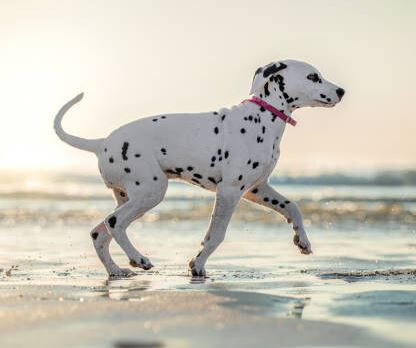

1/1 [==============================] - 0s 44ms/step
[[1.0000000e+00 1.8704004e-14]]
0
The image is of a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The image is of a Cat')

else:
  print('The image is of a Dog')